In [ ]:
# Start by wrapping up last week's homework. 
# Look through some of the codingbat problems you struggled with

In [ ]:
# some of these examples are loosely based on 
# https://medium.com/datadriveninvestor/machine-learning-preface-ba69bca4701d
# https://medium.com/datadriveninvestor/machine-learning-python-programming-introduction-for-business-people-10588e13ce9d
# You can reference them for more thorough analysis

In [2]:
# Let's start with a simple linear regression problem
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

x1 = np.random.rand(20)
x2 = np.random.rand(20)
y = x1/2 - x2 + np.random.rand(20) * .1

In [2]:
# What do you think the coefients of the linear regression solution to this problem are?
x = np.stack((x1, x2), 1)
RegressionModel = Ridge(1e-10).fit(x, y)

#The coefficients are the ROI of each input feature on our output target
coefs = RegressionModel.coef_.round(2)
coefs

array([ 0.51, -1.01])

In [3]:
# Talk about the above results. make sure you understand them.

In [4]:
# What a bout this scenario?
NUM_SAMPLES = 200

#Simulating data. x1 is random from 0 to 1
x1 = np.random.rand(NUM_SAMPLES)
#x2 is very correlated to x1, with small random fluctuations
x2 = x1 + np.random.rand(NUM_SAMPLES)/10

#x3-5 are random
x3 = np.random.rand(NUM_SAMPLES)
x4 = np.random.rand(NUM_SAMPLES)
x5 = np.random.rand(NUM_SAMPLES)

#y is generated by x1 - x2/2 + noise
y = x1 - x2/2 + np.random.rand(NUM_SAMPLES)/10

#Lets pack it all into a data frame. A data frame is similar to a SQL table, displayed below
df = pd.DataFrame({'x1':x1, 'x2':x2,'x3':x3,'x4':x4,'x5':x5, 'y':y})

df.head()

,x1,x2,x3,x4,x5,y
0,0.161551,0.204403,0.743003,0.603182,0.159283,0.112565
1,0.984799,1.034512,0.757378,0.556846,0.278350,0.500753
2,0.924725,0.953991,0.323287,0.790489,0.508103,0.498051
3,0.264779,0.267045,0.160907,0.491703,0.122899,0.213141
4,0.453573,0.512671,0.284348,0.434234,0.918229,0.210646


In [5]:
# Looking at how y is calculated, do we think it will be positively or negatively correlated to x1 and x2?

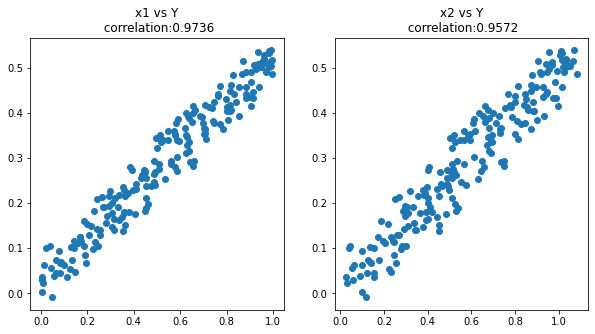

In [6]:
#Lets visualize the correlations between x1 vs Y and x2 vs Y
plt.figure(figsize=(10,5))
plt.subplot(1,2,1).scatter(x1,y)
plt.title('x1 vs Y\n correlation:' + str(np.corrcoef(x1, y)[0,1].round(4)))
plt.subplot(1,2,2).scatter(x2,y)
plt.title('x2 vs Y\n correlation:' + str(np.corrcoef(x2, y)[0,1].round(4)))
plt.show()

In [7]:
# So do we think the regression coefficients will also both be positive?

In [8]:

X = df[['x1', 'x2', 'x3', 'x4', 'x5']]
Y = df['y']

In [40]:
#Here we build a regression model using sklearn Ridge and fit it to our dataset
RegressionModel = Ridge(1e-4).fit(X,Y)

#The coefficients are the ROI of each input feature on our output target
coefs = RegressionModel.coef_.round(2)


In [41]:
print('Regression coefficients from Sklearn')
print(list(zip(['x1', 'x2', 'x3', 'x4', 'x5'], coefs)))

Regression coefficients from Sklearn
[('x1', 1.07), ('x2', -0.57), ('x3', 0.01), ('x4', -0.01), ('x5', -0.0)]


In [43]:
n_data = 20
n_features = 5
x = np.random.rand(n_data, n_features)
mults = np.random.rand(n_features)
y = x.dot(mults)

In [44]:
y

array([0.52303878, 1.42311118, 0.64066065, 1.38650044, 1.48648585,
       1.12523585, 1.1171503 , 1.02104956, 1.04557849, 0.99697493,
       0.75558842, 1.13228964, 0.98148178, 1.43375204, 0.74568146,
       1.49376215, 0.98480985, 1.07452662, 1.66936788, 0.8986495 ])

In [49]:
RegressionModel = Ridge(1e-3).fit(X,Y)

#The coefficients are the ROI of each input feature on our output target
coefs = RegressionModel.coef_.round(2)
np.abs(coefs - mults).sum()

2.0018184379155306

In [46]:
np.abs(coefs - mults).sum()

2.0018184379155306

In [48]:
coefs

array([ 1.06, -0.56,  0.01, -0.01, -0.  ])

In [1]:
# Discuss why this worked whereas correlation was misleading.
# If we wanted the model to learn more precisely (x1: +1, x2: -.5), how could we change the dataset to help the model learn?

In [ ]:
# Design your own custom problem set via random simulation
# Show that you can solve that problem set via ML and that the model
# can learn some of the ground truths of the simulation

In [114]:
n_image = 1000
width = 10
images = np.random.rand(n_image, width, width, 3) /2  + .1
y = np.random.randint(2, size = n_image)

In [115]:
for i, yi in enumerate(y):
    if yi:
        loc_x = np.random.randint(width-1)
        loc_y = np.random.randint(1, width-1)
        images[i, loc_x, loc_y,:] = 0
        images[i, loc_x+1, loc_y-1,:] = [1, 0, 0]
        images[i, loc_x+1, loc_y,:] = [0, 1, 0]
        images[i, loc_x+1, loc_y+1,:] = [0, 0, 1]

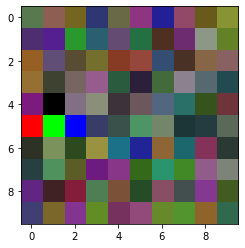

In [116]:
plt.imshow(images[y.argmax()])

In [117]:
images.shape
images[0].shape

(10, 10, 3)

In [120]:
images_line = images.reshape(images.shape[0], -1)

In [125]:
images_line

array([[0.347255  , 0.47136333, 0.31576076, ..., 0.1927163 , 0.41455907,
        0.31152024],
       [0.15079076, 0.20581968, 0.54105128, ..., 0.13619825, 0.35550065,
        0.54586464],
       [0.35175071, 0.15855023, 0.58330059, ..., 0.45639127, 0.17665476,
        0.39374651],
       ...,
       [0.23619662, 0.23782202, 0.54703034, ..., 0.51534932, 0.2937425 ,
        0.55953931],
       [0.43759601, 0.32538815, 0.3291184 , ..., 0.52509644, 0.15068832,
        0.46169692],
       [0.53022864, 0.49740969, 0.36897427, ..., 0.33981142, 0.52817919,
        0.41336382]])

In [121]:
Model = Ridge().fit(images_line, y)
coefs = Model.coef_.round(2)
coefs

array([ 0.07, -0.07,  0.14, -0.02, -0.11, -0.07, -0.21,  0.08, -0.  ,
       -0.  , -0.02, -0.01, -0.1 , -0.13, -0.23, -0.1 ,  0.04, -0.12,
       -0.1 , -0.2 , -0.15, -0.07, -0.11, -0.17, -0.05,  0.07, -0.04,
       -0.05,  0.07, -0.  ,  0.08, -0.1 , -0.22, -0.09, -0.06, -0.12,
        0.11,  0.05, -0.01,  0.  ,  0.1 , -0.19, -0.23, -0.21, -0.16,
        0.16, -0.07,  0.01, -0.17, -0.08,  0.06, -0.06, -0.16,  0.02,
       -0.16, -0.08, -0.17, -0.23, -0.12, -0.02,  0.19,  0.03, -0.23,
        0.14, -0.03,  0.01, -0.1 , -0.02, -0.1 , -0.27, -0.05, -0.1 ,
       -0.02, -0.03, -0.17,  0.02, -0.1 , -0.09,  0.16, -0.03,  0.08,
       -0.25, -0.25, -0.11, -0.09, -0.05,  0.06,  0.01, -0.18,  0.17,
        0.18,  0.07, -0.02,  0.11, -0.1 , -0.27,  0.12,  0.  ,  0.14,
       -0.03, -0.  ,  0.07, -0.26,  0.06,  0.08, -0.06, -0.14,  0.  ,
        0.06,  0.14,  0.04, -0.09,  0.  , -0.04,  0.06, -0.06,  0.07,
       -0.15,  0.02,  0.19,  0.16, -0.14,  0.11, -0.05, -0.08, -0.26,
       -0.2 , -0.14,

In [122]:
((Model.predict(images_line).round(2)> .5)==y).mean()

0.798

In [123]:
# Show that if you reduced regularization, the model would learn the features more accurately
# What else could we change about the setup to help the model learn more accurately?

In [ ]:
# Potentially break here. The following section may be either in class, homework, or a following session.

In [ ]:
# Images are complex objects with structure. Lets pretend we need to solve a problem with images.
# We want to design a pickle detector, where a pickle is defined as any cell that is close to black
# Above three cells which are <red, blue, green>. An image is either True or False based on if 
# they have a pickle or not.
# Design a dataset to solve this problem.
# Visualize some of the images to make sure they are formed correctly.
# train a model using scikit-learn that solves it.
# Over the following few weeks we will get tools that let us model structured problems
# like these much more efficiently.

In [124]:
def make_data(n_image = 1000, width = 10):

    images = np.random.rand(n_image, width, width, 3) /2  + .1
    y = np.random.randint(2, size = n_image)

    for i, yi in enumerate(y):
        if yi:
            loc_x = np.random.randint(width-1)
            loc_y = np.random.randint(1, width-1)
            images[i, loc_x, loc_y,:] = 0
            images[i, loc_x+1, loc_y-1,:] = [1, 0, 0]
            images[i, loc_x+1, loc_y,:] = [0, 1, 0]
            images[i, loc_x+1, loc_y+1,:] = [0, 0, 1]
                        
    return images

In [ ]:
        
images_line = images.reshape(images.shape[0], -1)


Model = Ridge().fit(images_line, y)


((Model.predict(images_line).round(2)> .5)==y).mean()